In [1]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans

In [2]:
# Import .xlsx file and convert it to a DataFrame object
df = pd.read_excel("EastWestAirlines.xlsx");
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [17]:
df.shape

(3999, 12)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
# The StandardScaler is a preprocessing technique used to standardize features by removing the mean and scaling to unit variance. 
# This means it transforms the data so that it has a mean of 0 and a standard deviation of 1.
stscaler = StandardScaler()
X = stscaler.fit_transform(df)
X

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [5]:
# This is where we get the descriptive statistics of the data
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [6]:
# to get the numerical columns
nc= df.select_dtypes(include=[np.number]).columns
print("Numerical columns:", nc)

Numerical columns: Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')


In [16]:
df.info

<bound method DataFrame.info of        ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0

In [7]:
df.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [8]:
# To get the duplicate values in the datatset
df[df.duplicated()]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


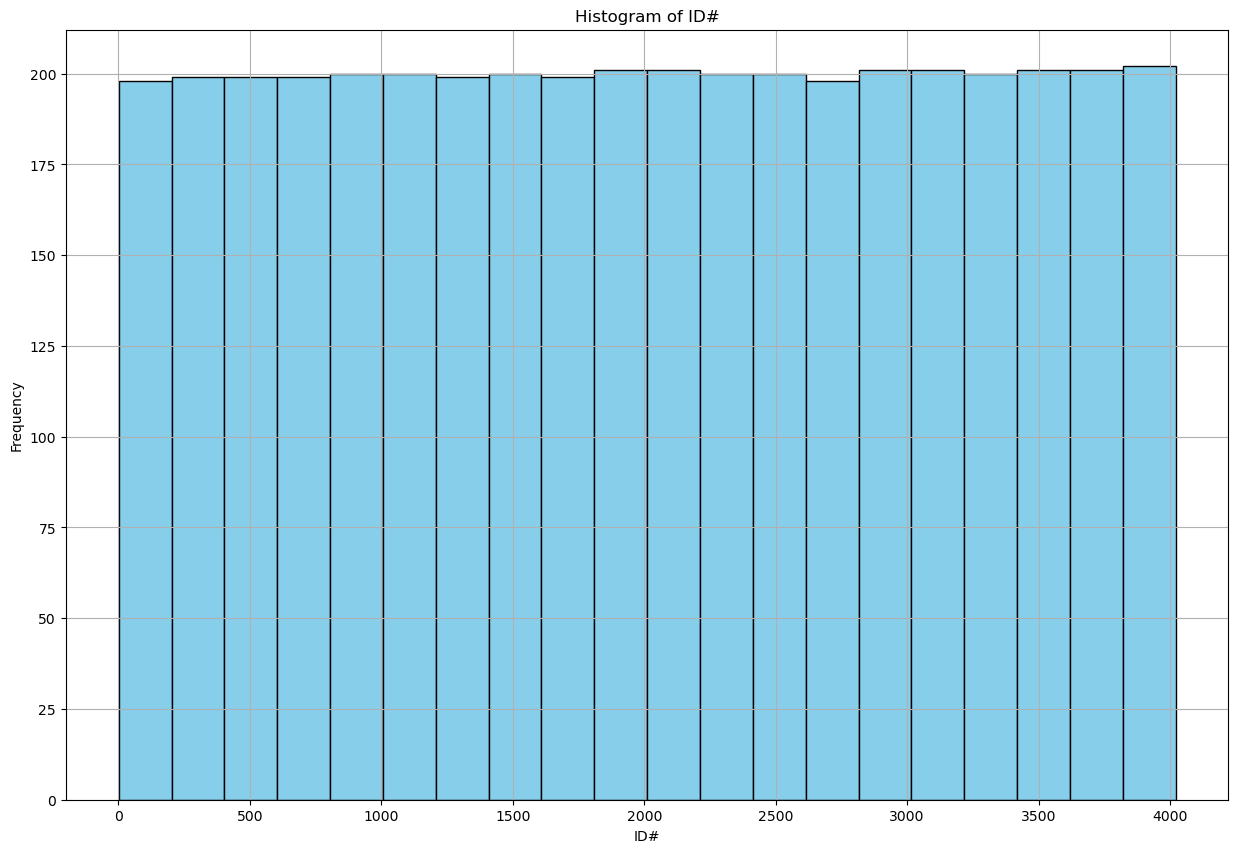

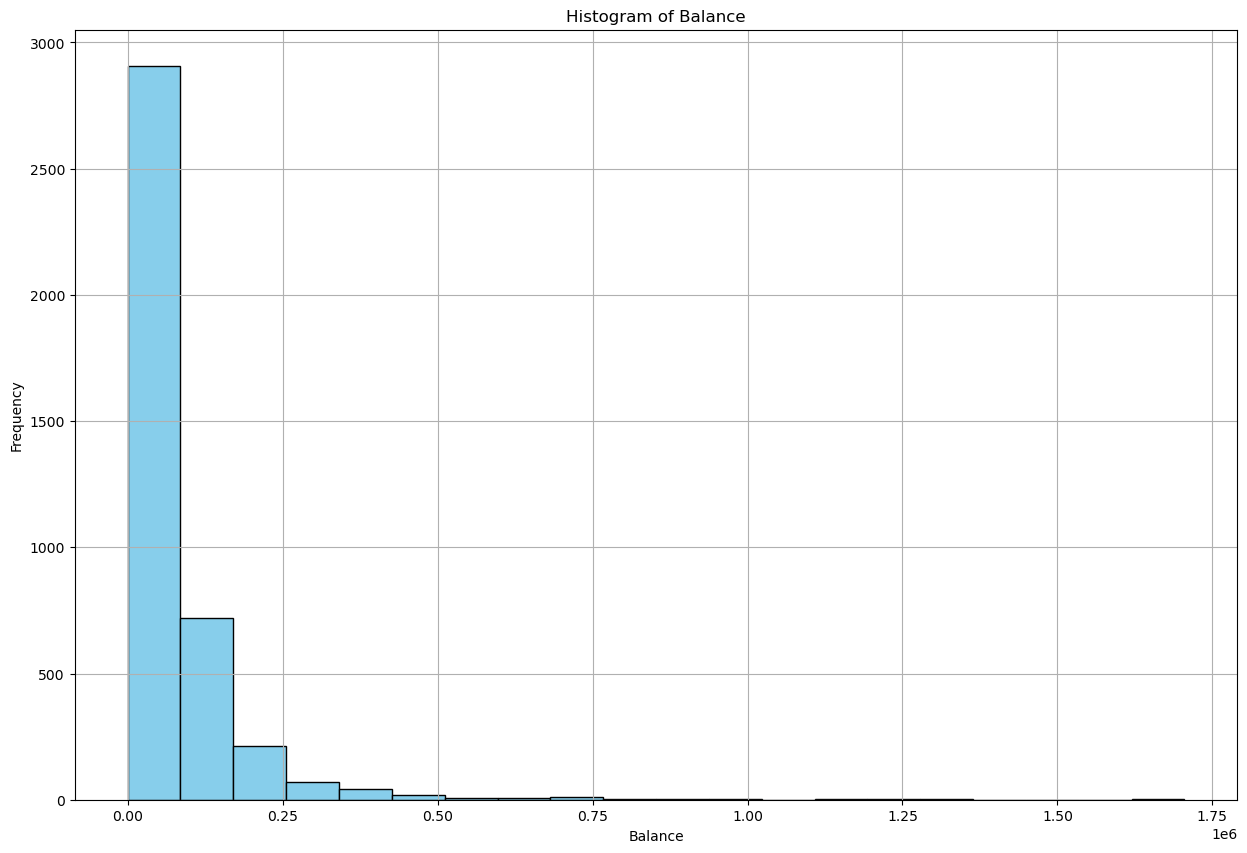

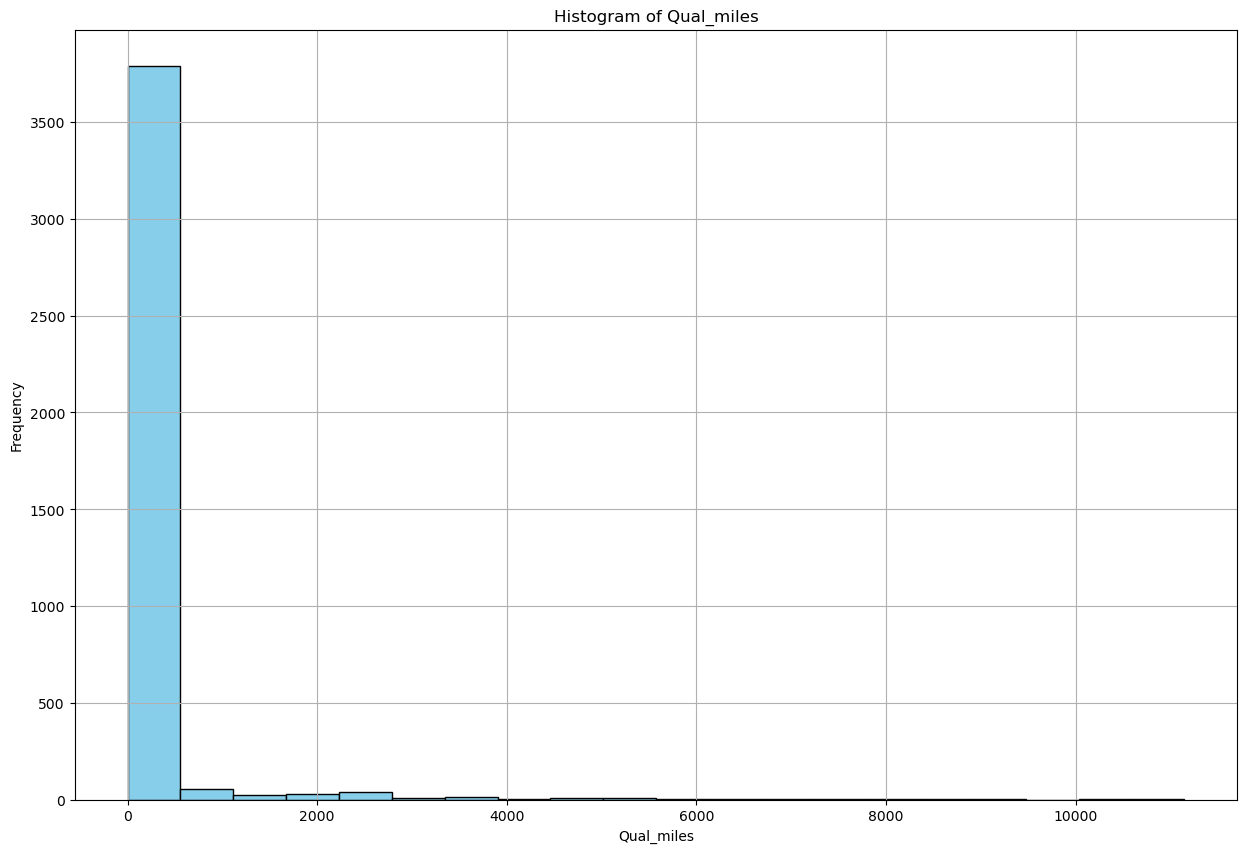

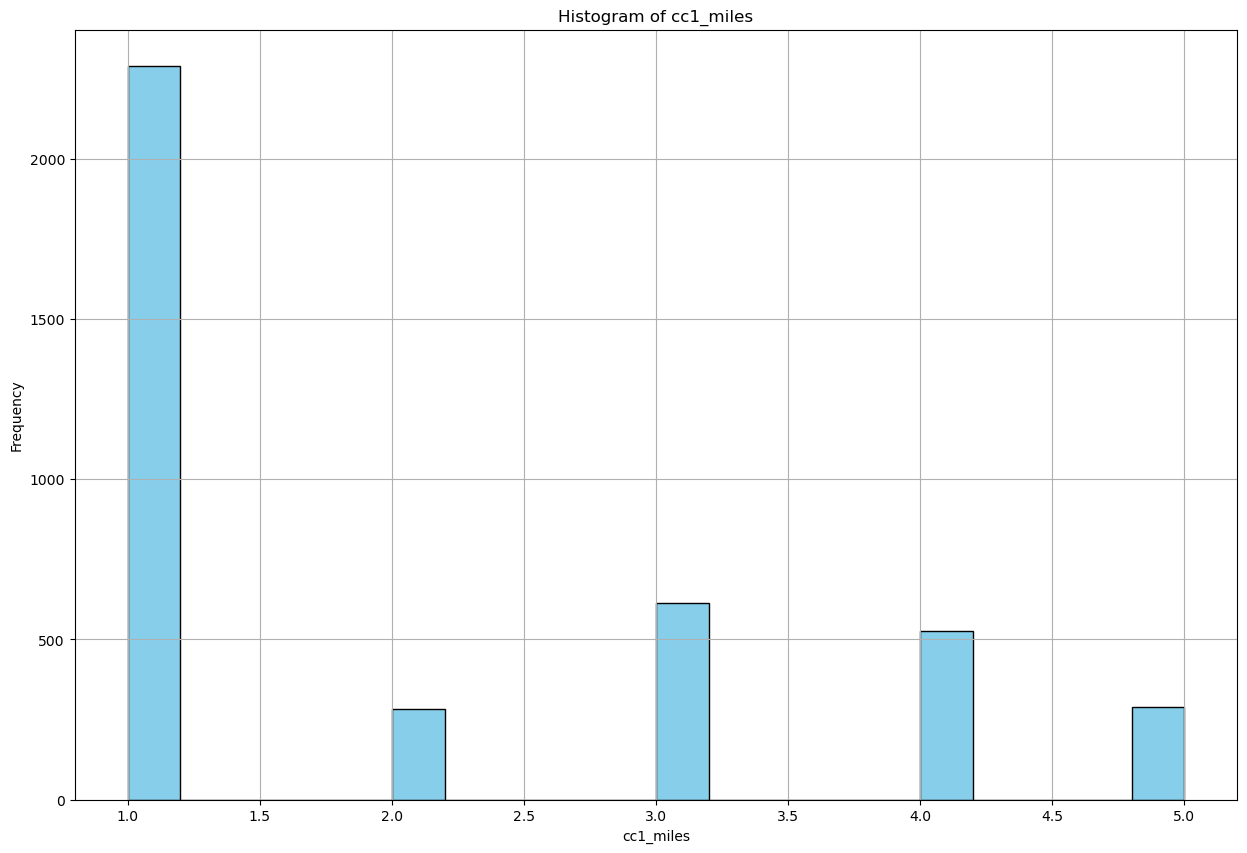

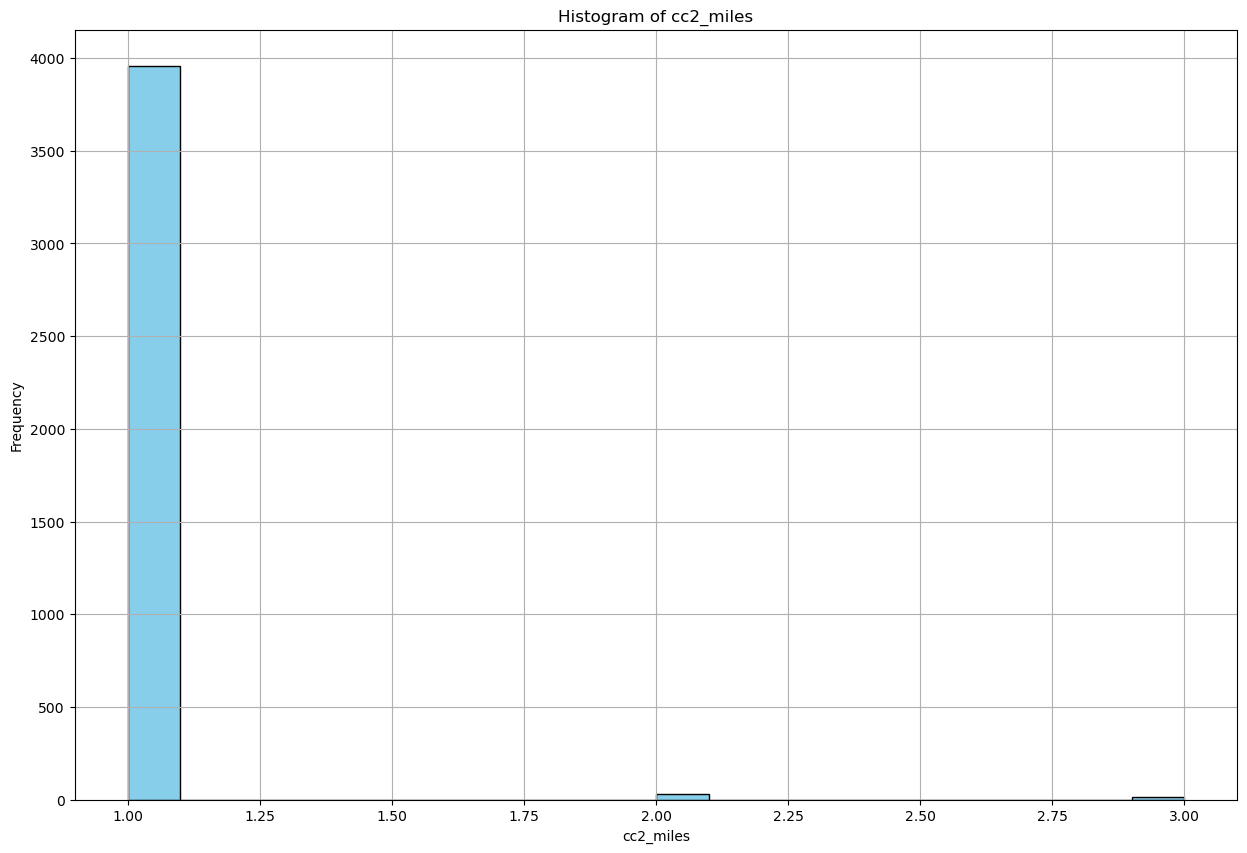

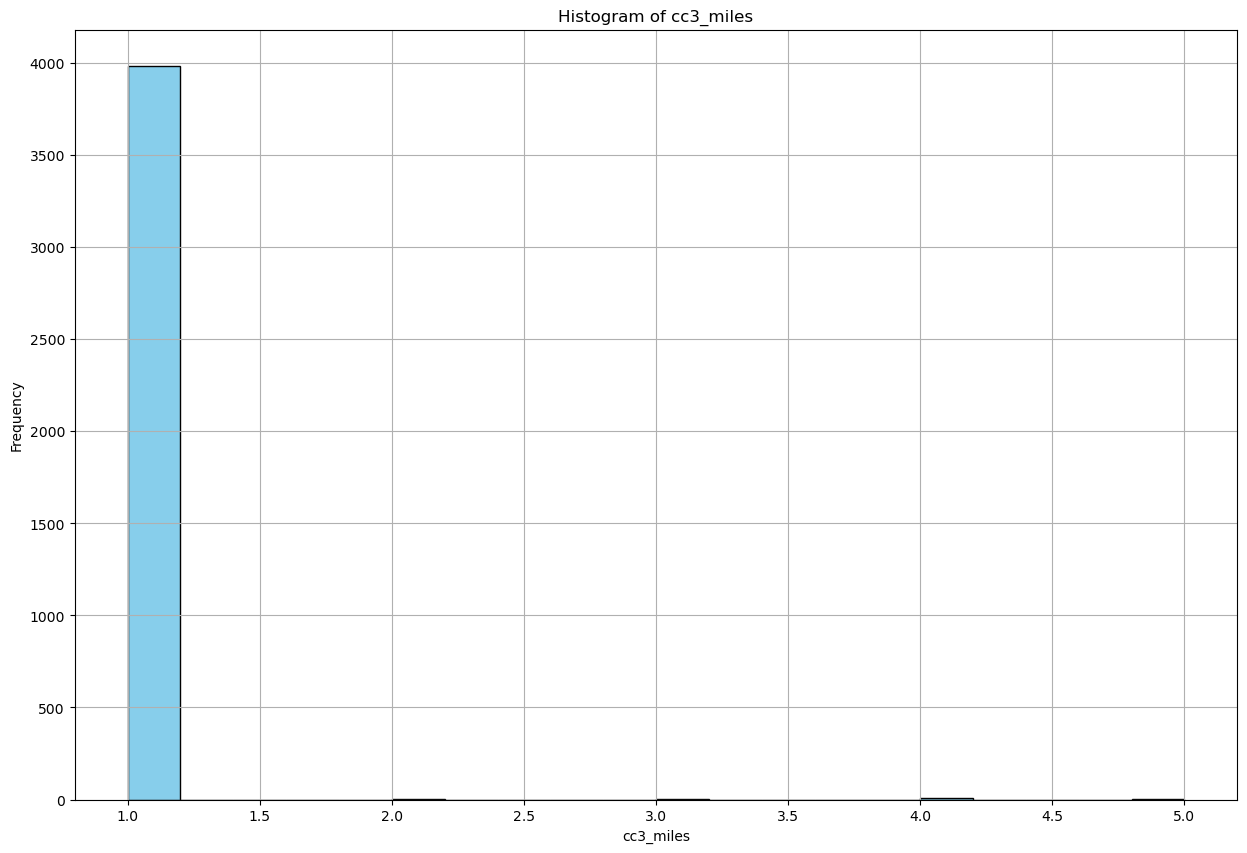

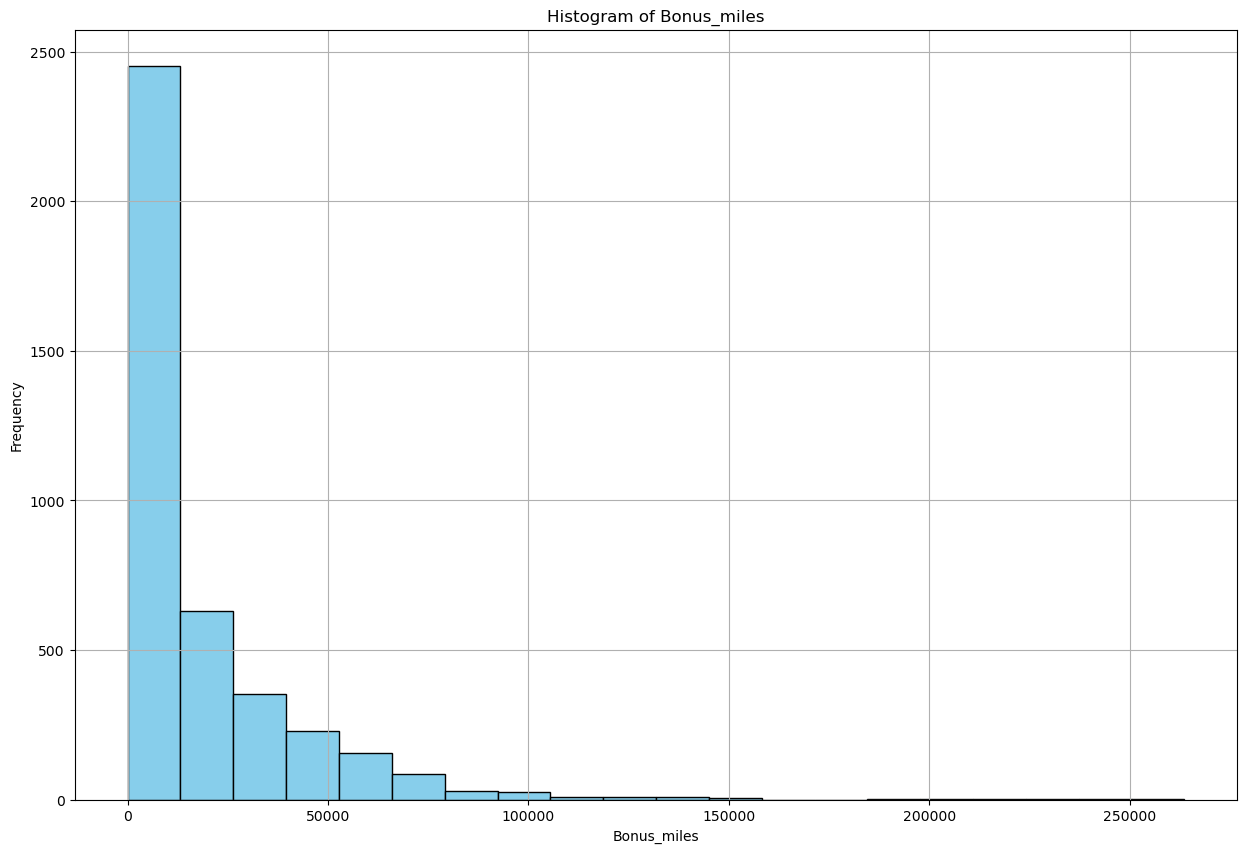

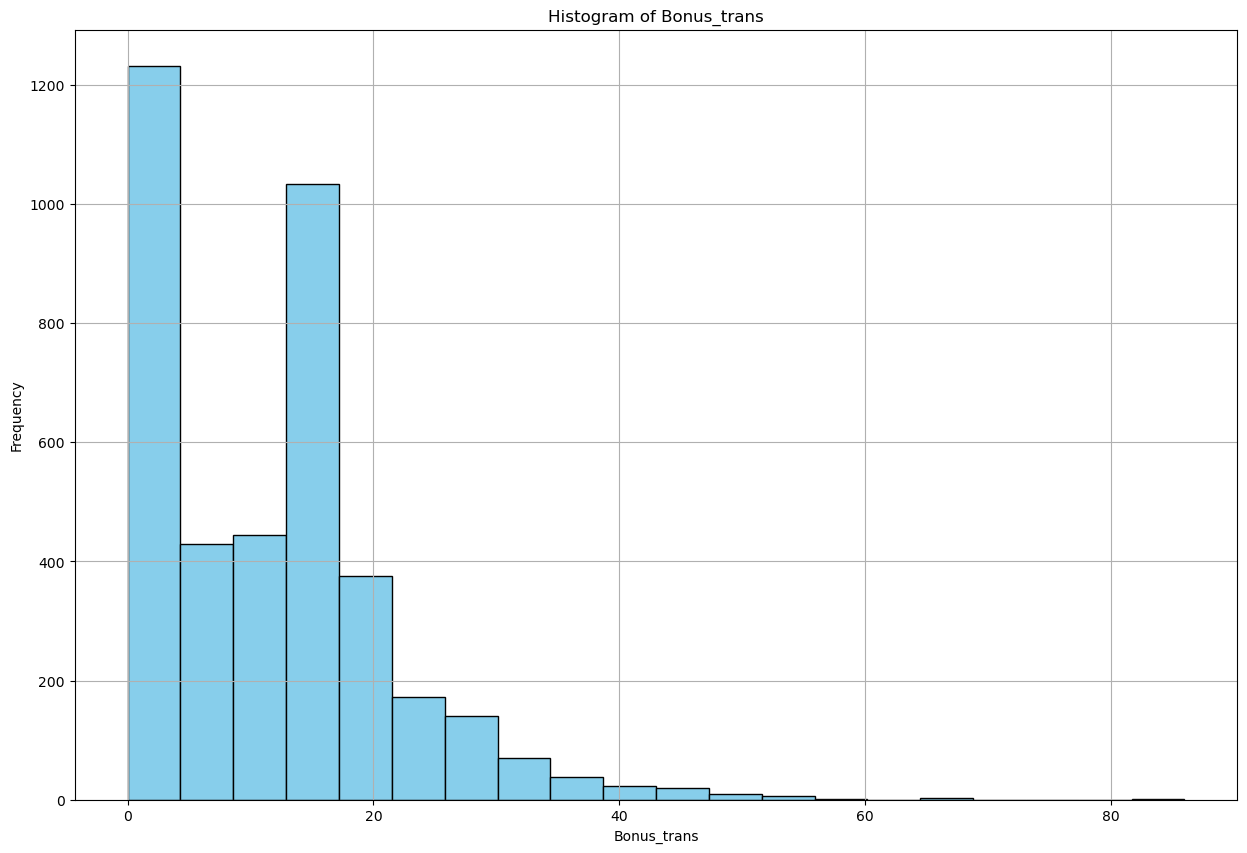

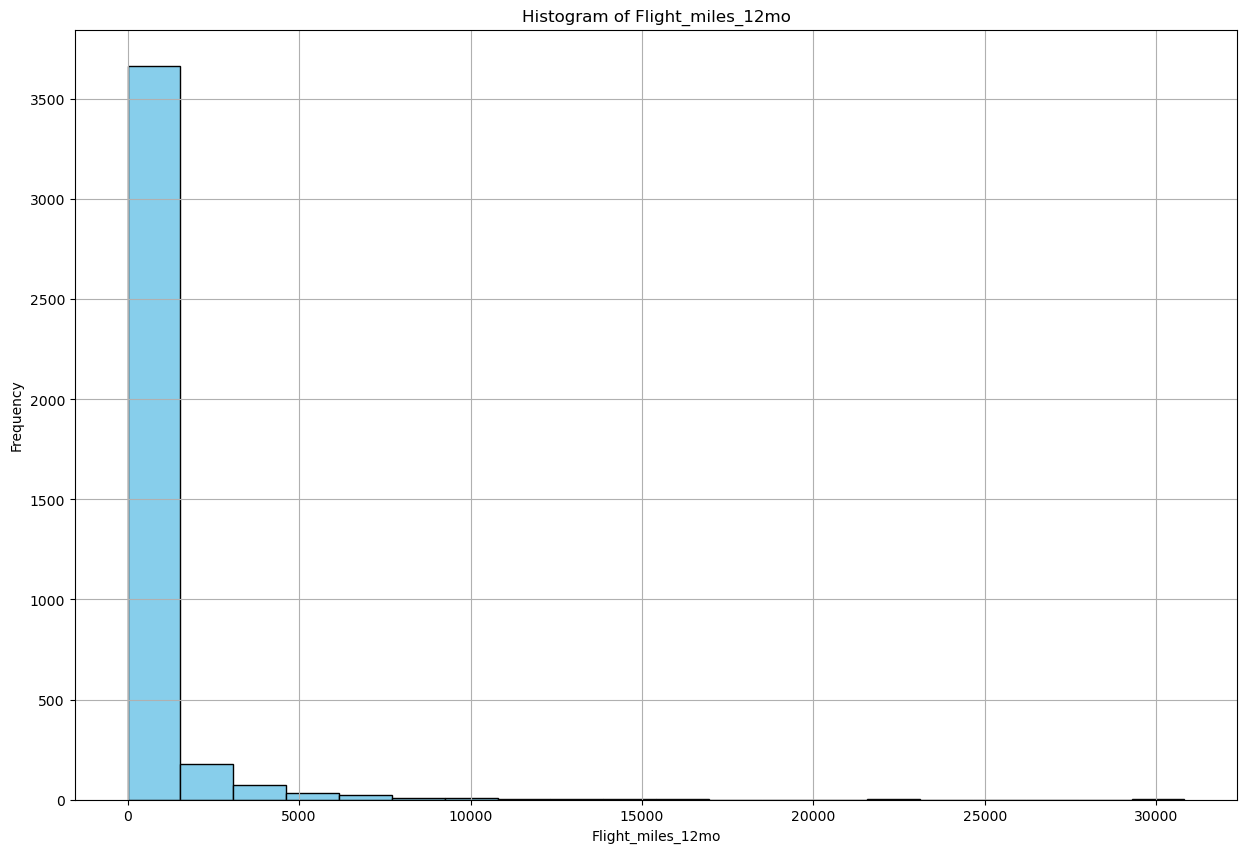

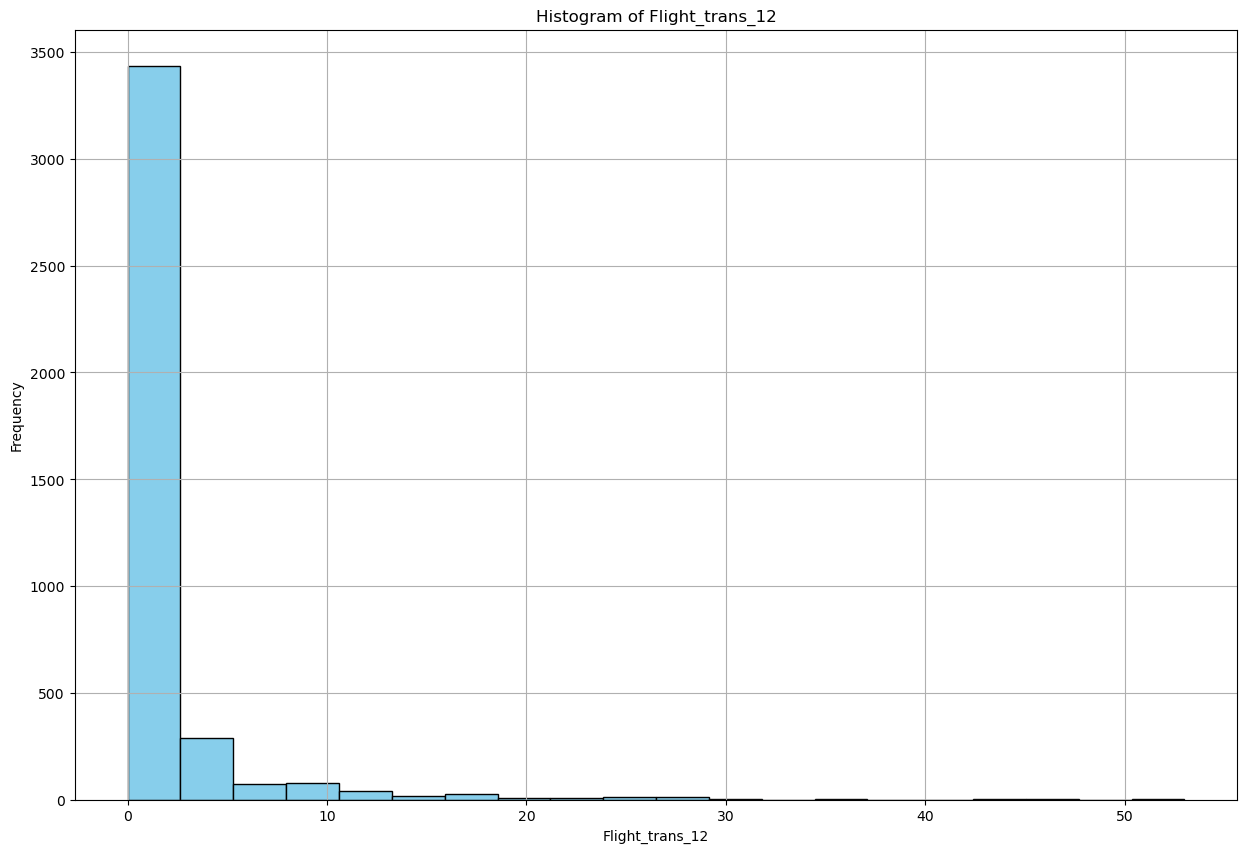

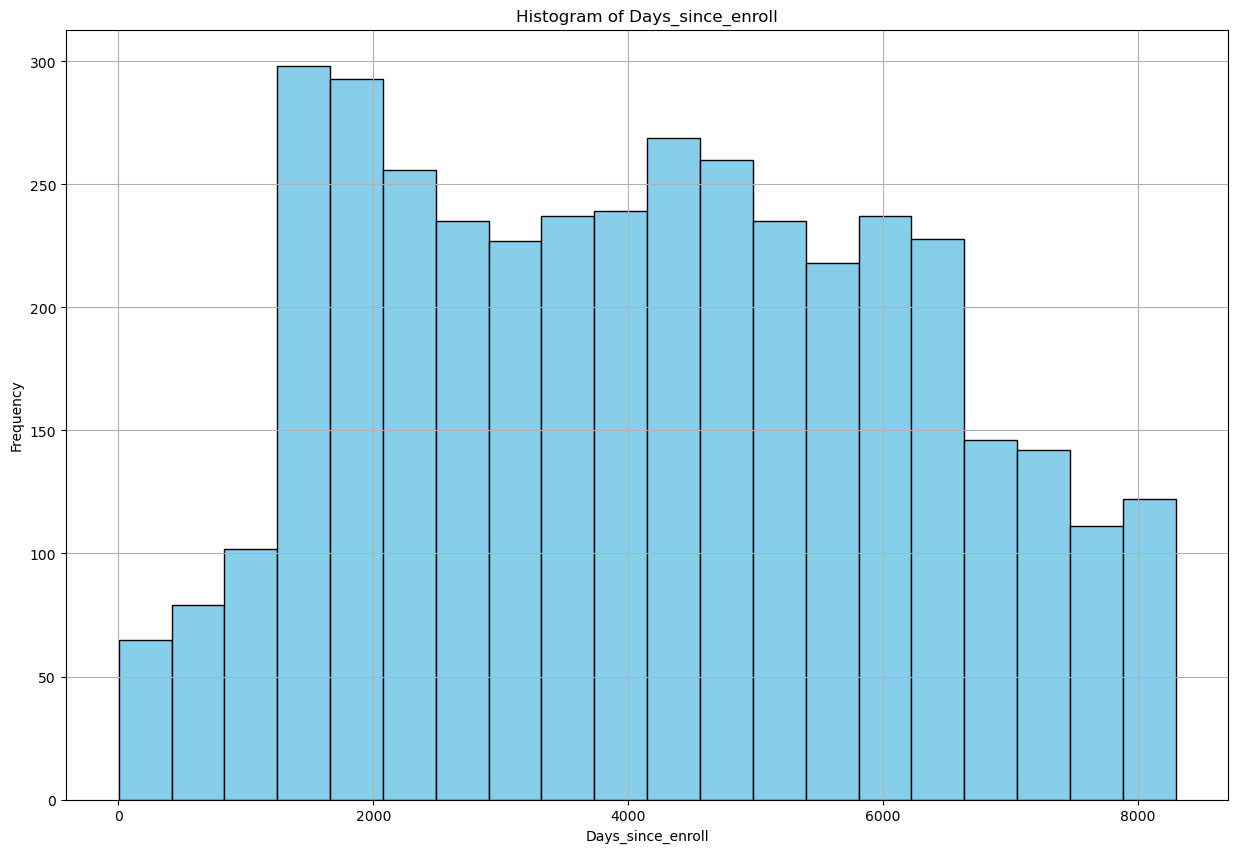

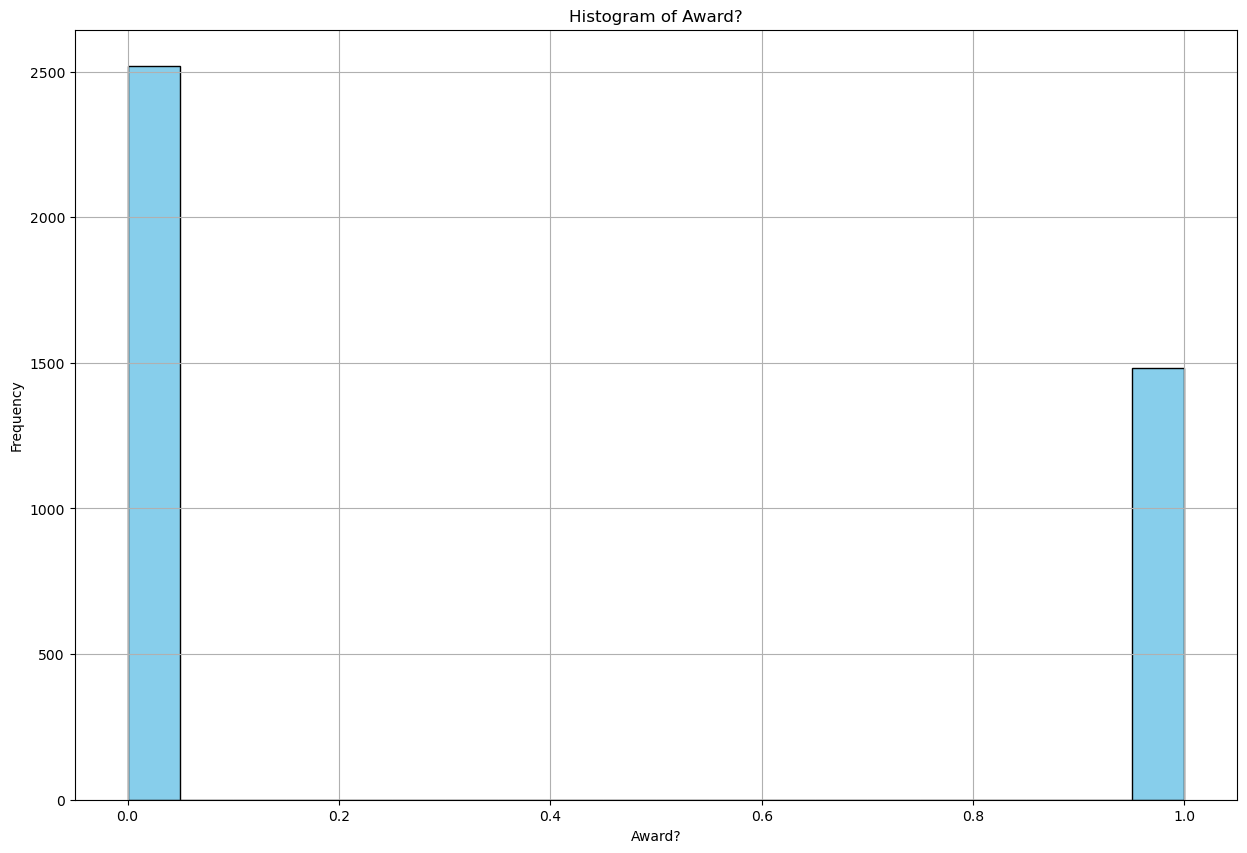

In [9]:
# For printing the bar charts of each columns
for col in df.columns: # for loop for plotting histogram for  all columns in df
    plt.figure(figsize=(15, 10))  # Set the figure size
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')  # Plot histogram
    plt.title(f'Histogram of {col}')  # Set the title of the plot
    plt.xlabel(col)  # Set the x-axis label
    plt.ylabel('Frequency')  # Set the y-axis label
    plt.grid(True)  # Add grid
    plt.show()  # Show the plot

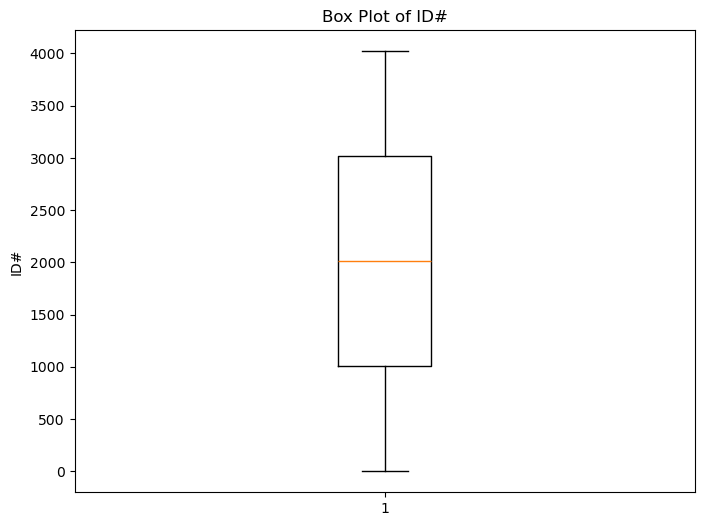

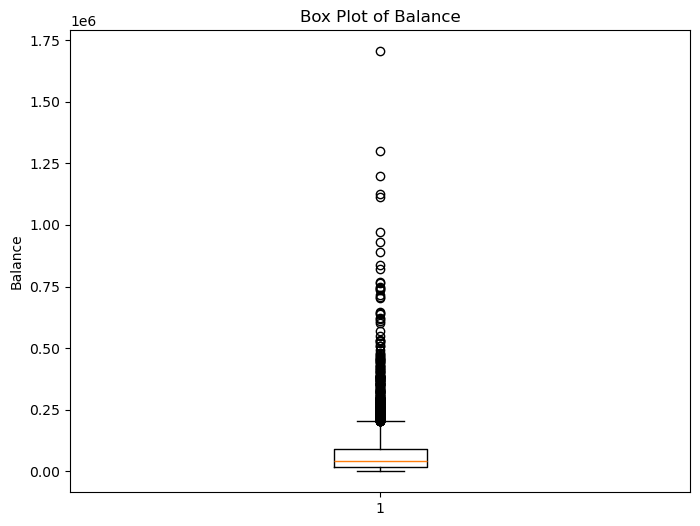

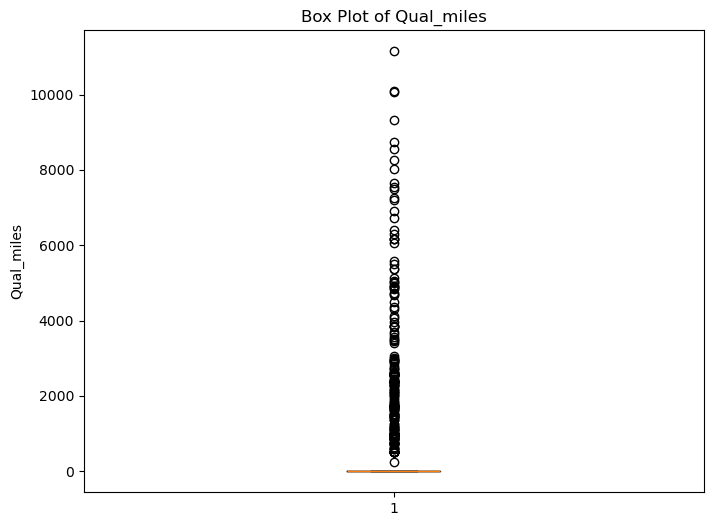

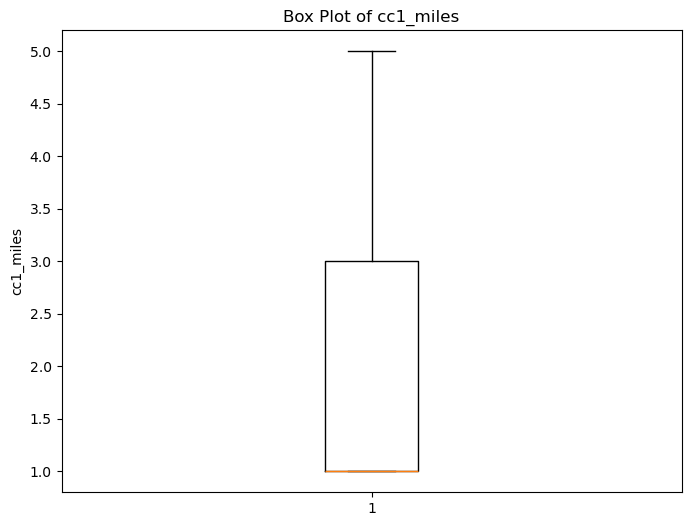

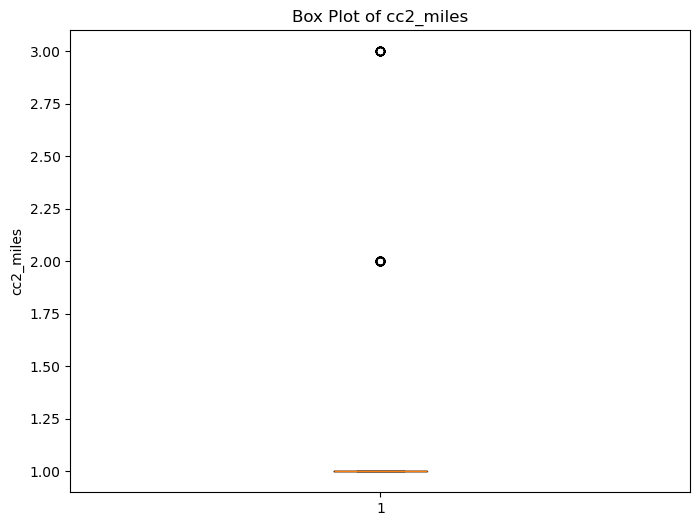

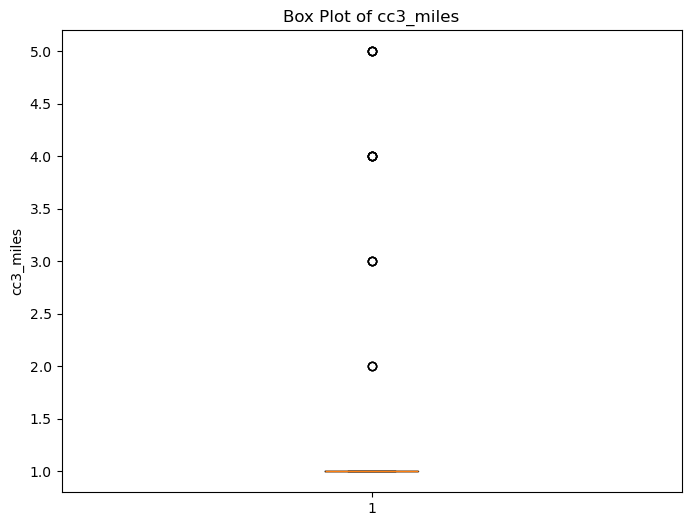

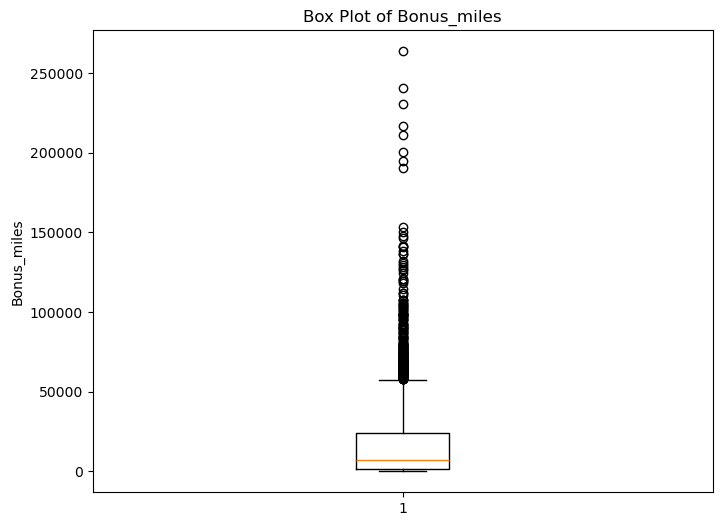

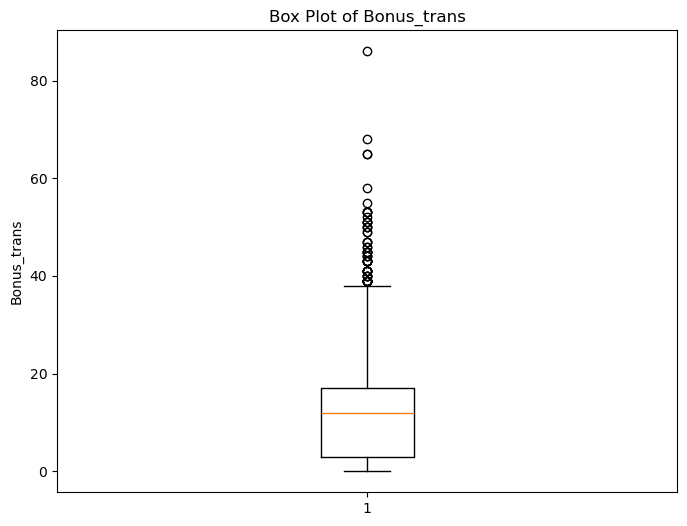

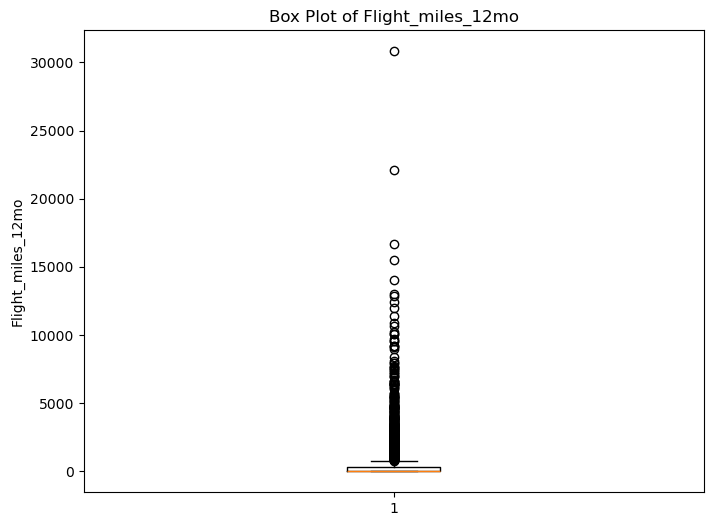

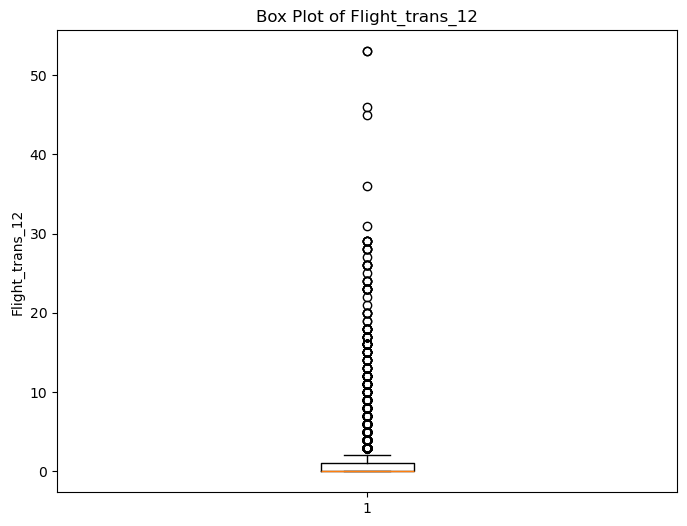

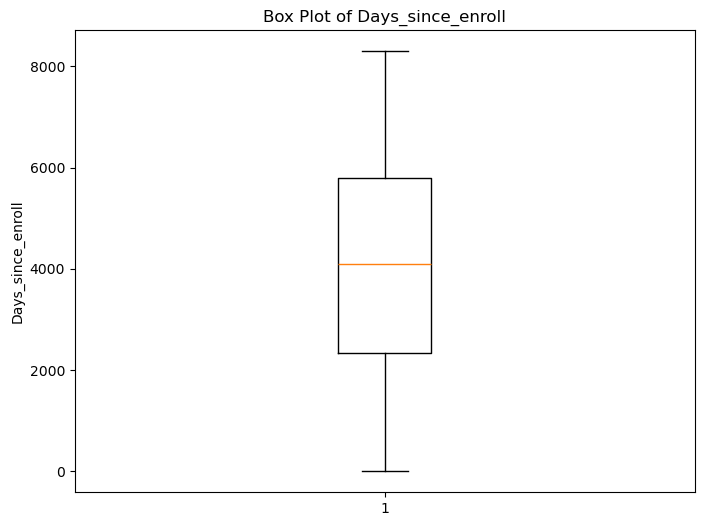

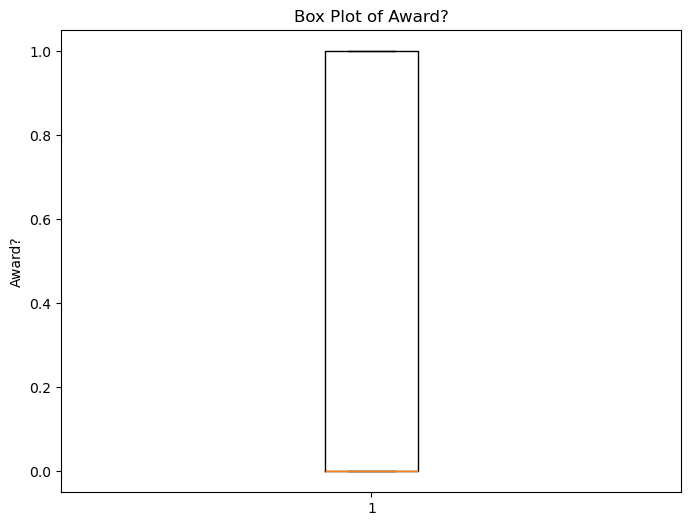

In [10]:
# for getting the box plot for understanding where and what outliers are there
for col in df.columns: # for loop for plotting box plot for  all columns in df
    plt.figure(figsize=(8, 6))  # Set the figure size
    plt.boxplot(df[col])  # Plot the box plot for the current column
    plt.title(f'Box Plot of {col}')  # Set the title of the box plot
    plt.xlabel('')  # Remove x-axis label
    plt.ylabel(col)  # Set the y-axis label as the column name
    plt.show()  # Show the plot

In [21]:
import numpy as np

# Define a function to remove outliers using Z-score method
def remove_outliers_zscore(df, threshold=3):
    z_scores = np.abs((df - df.mean()) / df.std())
    return df[(z_scores < threshold).all(axis=1)]

# Apply the function to remove outliers
df = remove_outliers_zscore(df)

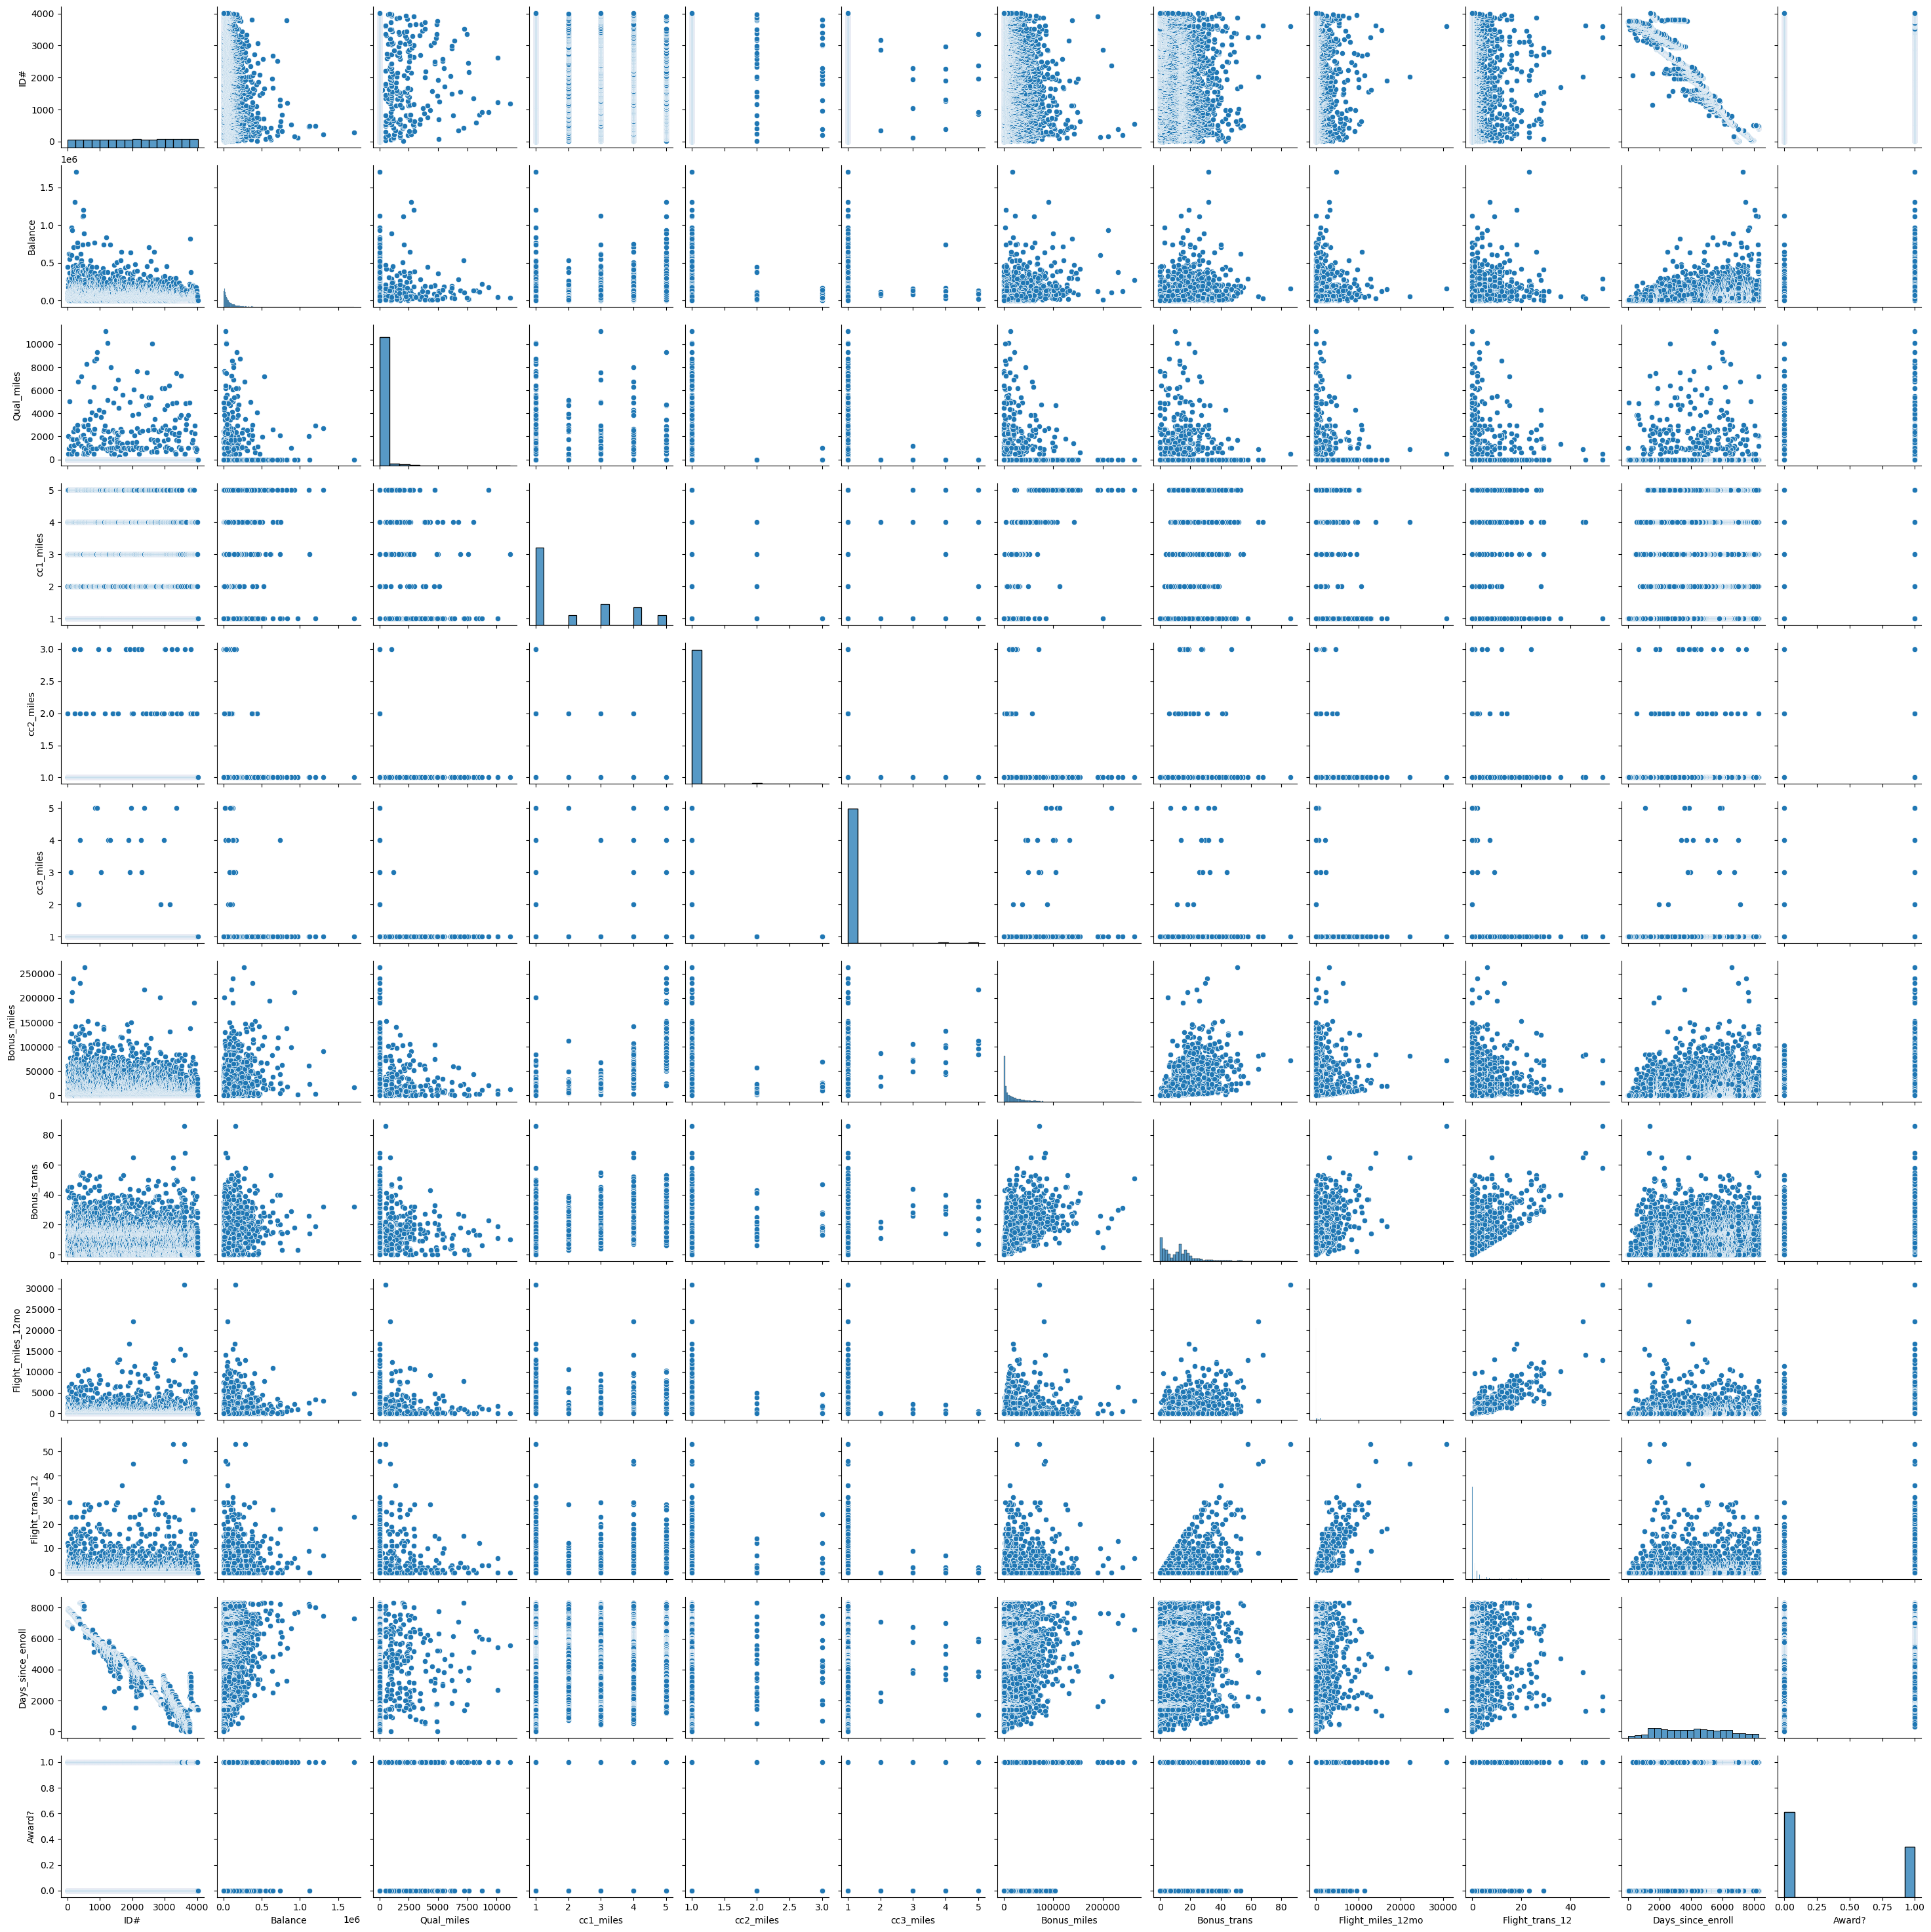

In [11]:
# for getting the pair plots of each columns in the dataframe
sns.pairplot(df)

In [12]:
# dataframe need to convert to array because 
# Many scientific and mathematical libraries in Python,
# such as SciPy, scikit-learn, and others, expect inputs to be in the form of NumPy arrays. 
# NumPy arrays consume less memory than pandas DataFrames because they do not carry around index and column labels.
# NumPy arrays provide faster computations compared to pandas DataFrames due to their homogeneous nature.
array1 = df.values
array1

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]], dtype=int64)

In [22]:
# DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm used in 
# machine learning and data analysis. It groups together points that are close to each other (dense regions) and 
# marks points that are in low-density regions as outliers.
dbscan = DBSCAN(eps=3.5, min_samples=5)
# DBSCAN: This is the class provided by the Scikit-learn library to perform DBSCAN clustering.
# eps=3.5: This parameter, known as epsilon, defines the maximum distance between two points for them to be considered as neighbors. 
# In other words, it's the radius of the neighborhood around a point.
# min_samples=5: This parameter specifies the minimum number of points required to form a dense region. 
# If a point has at least this many neighbors (including itself) within the eps radius, it is considered a core point.
clusters = dbscan.fit_predict(X)

In [23]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

[47988.00000000001, 39018.84742954433, 34529.168666113335, 30616.623636092638, 26894.75305989324, 23490.74902876985, 21885.3682448693, 19330.695176303714, 18015.300658980443]


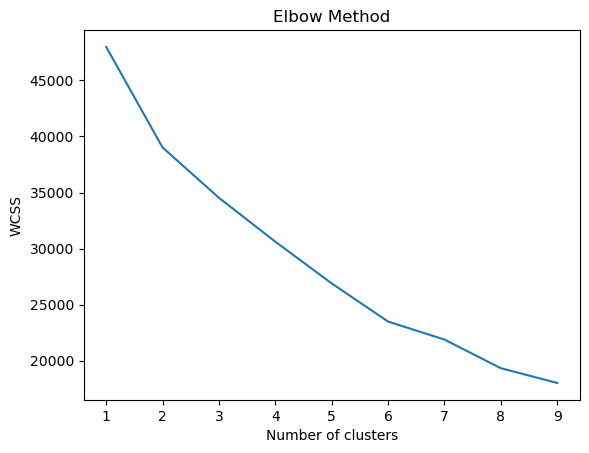

In [14]:
# An elbow plot is a visualization technique used in data analysis, specifically in cluster analysis. 
# It helps determine the optimal number of clusters (groups) for a given dataset 
# when using a clustering algorithm like K-means.
wcss = []
# The plot focuses on a metric called Within-Cluster Sum of Squares (WCSS). 
# This represents the total squared distance between data points 
# and their assigned cluster center (centroid) within each cluster.
for i in range(1, 10):
    
    kmeans = KMeans(n_clusters=i,random_state=0 )
    kmeans.fit(X)
    #kmeans.fit(Univ1)
    wcss.append(kmeans.inertia_)
print(wcss)    
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
# Scale the features if necessary
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convert the scaled array back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Print the scaled dataset
print("Scaled Dataset:")
print(df_scaled.head())


Scaled Dataset:
        ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0 -1.766204 -0.522869   -0.158847  -0.755769        0.0        0.0   
1 -1.765339 -0.666201   -0.158847  -0.755769        0.0        0.0   
2 -1.764474 -0.310086   -0.158847  -0.755769        0.0        0.0   
3 -1.763609 -0.738164   -0.158847  -0.755769        0.0        0.0   
4 -1.762744  0.598287   -0.158847   1.517800        0.0        0.0   

   Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
0    -0.779191    -1.147067          -0.402146        -0.432082   
1    -0.776929    -1.025935          -0.402146        -0.432082   
2    -0.561368    -0.783671          -0.402146        -0.432082   
3    -0.761209    -1.147067          -0.402146        -0.432082   
4     1.599599     1.881231           2.858792         1.767552   

   Days_since_enroll    Award?  
0           1.431303 -0.718384  
1           1.415712 -0.718384  
2           1.447868 -0.718384  
3           1.407917 -0.7183

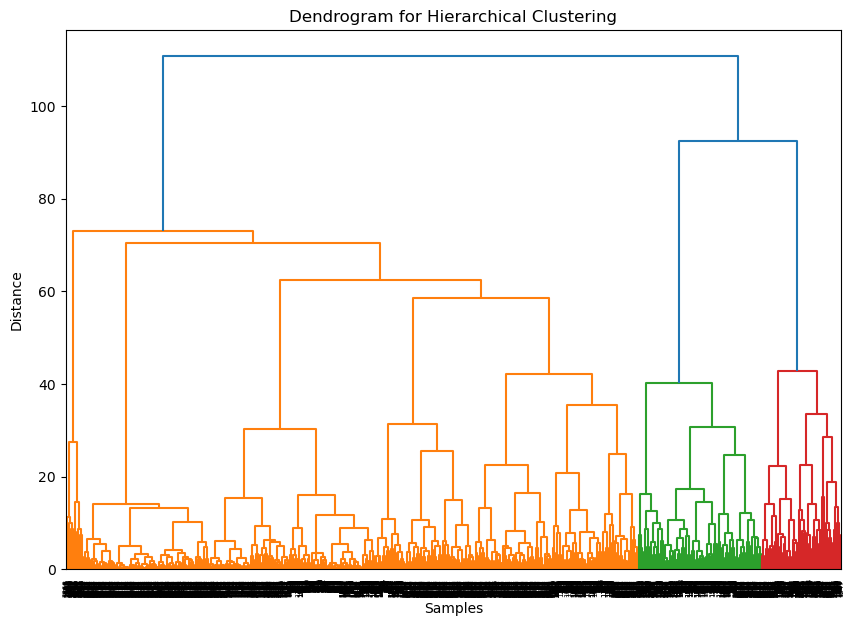

Silhouette Score for Hierarchical Clustering: 0.2735264665074105


In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Generate the linkage matrix
Z = linkage(df_scaled, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(df_scaled)

# Silhouette Score for Hierarchical Clustering
silhouette_hierarchical = silhouette_score(df_scaled, hierarchical_labels)
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical}')


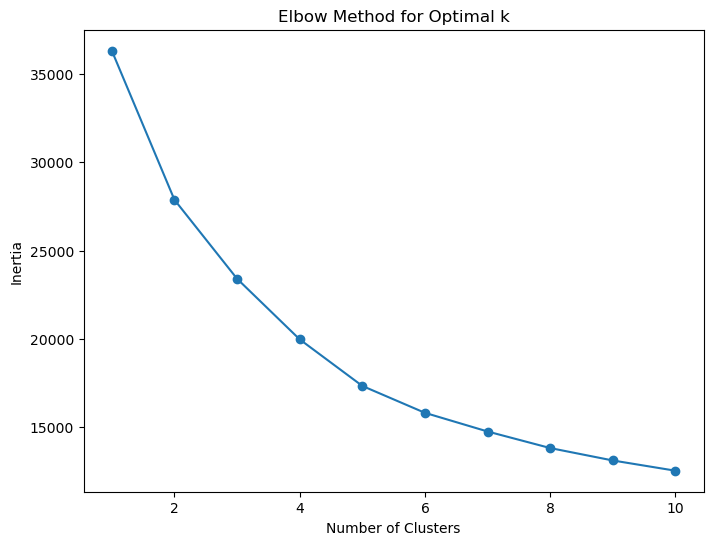

Silhouette Score for K-Means: 0.29202555388095874


In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Apply K-Means with optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

# Silhouette Score for K-Means
silhouette_kmeans = silhouette_score(df_scaled, kmeans_labels)
print(f'Silhouette Score for K-Means: {silhouette_kmeans}')

In [31]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN with chosen epsilon and min_samples
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

# Silhouette Score for DBSCAN
if len(set(dbscan_labels)) > 1:
    silhouette_dbscan = silhouette_score(df_scaled, dbscan_labels)
    print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')
else:
    silhouette_dbscan = -1
    print('DBSCAN did not find any clusters')


Silhouette Score for DBSCAN: -0.3837867186664558


In [32]:
# Add cluster labels to the DataFrame
df_scaled['KMeans_Cluster'] = kmeans_labels
df_scaled['Hierarchical_Cluster'] = hierarchical_labels
df_scaled['DBSCAN_Cluster'] = dbscan_labels

print("Cluster Labels Added:")
print(df_scaled.head())

for cluster in range(3):
    print(f"\nK-Means Cluster {cluster}:")
    print(df_scaled[df_scaled['KMeans_Cluster'] == cluster].describe())

    print(f"\nHierarchical Cluster {cluster}:")
    print(df_scaled[df_scaled['Hierarchical_Cluster'] == cluster].describe())

if silhouette_dbscan != -1:
    for cluster in set(dbscan_labels):
        print(f"\nDBSCAN Cluster {cluster}:")
        print(df_scaled[df_scaled['DBSCAN_Cluster'] == cluster].describe())


Cluster Labels Added:
        ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0 -1.766204 -0.522869   -0.158847  -0.755769        0.0        0.0   
1 -1.765339 -0.666201   -0.158847  -0.755769        0.0        0.0   
2 -1.764474 -0.310086   -0.158847  -0.755769        0.0        0.0   
3 -1.763609 -0.738164   -0.158847  -0.755769        0.0        0.0   
4 -1.762744  0.598287   -0.158847   1.517800        0.0        0.0   

   Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
0    -0.779191    -1.147067          -0.402146        -0.432082   
1    -0.776929    -1.025935          -0.402146        -0.432082   
2    -0.561368    -0.783671          -0.402146        -0.432082   
3    -0.761209    -1.147067          -0.402146        -0.432082   
4     1.599599     1.881231           2.858792         1.767552   

   Days_since_enroll    Award?  KMeans_Cluster  Hierarchical_Cluster  \
0           1.431303 -0.718384               1                     0   
1         

              ID#     Balance    Qual_miles     cc1_miles  cc2_miles  \
count  121.000000  121.000000  1.210000e+02  1.210000e+02      121.0   
mean    -0.219008   -0.570672 -1.588467e-01 -7.557690e-01        0.0   
std      0.813394    0.350978  1.672259e-16  1.895227e-15        0.0   
min     -1.732470   -0.972143 -1.588467e-01 -7.557690e-01        0.0   
25%     -0.897758   -0.822272 -1.588467e-01 -7.557690e-01        0.0   
50%     -0.191064   -0.685496 -1.588467e-01 -7.557690e-01        0.0   
75%      0.472381   -0.382807 -1.588467e-01 -7.557690e-01        0.0   
max      1.278548    0.707344 -1.588467e-01 -7.557690e-01        0.0   

       cc3_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count      121.0   121.000000   121.000000       1.210000e+02   
mean         0.0    -0.663606    -0.825717      -4.021456e-01   
std          0.0     0.146250     0.518588       1.003355e-15   
min          0.0    -0.788789    -1.268199      -4.021456e-01   
25%          0.0    -0.788

             ID#    Balance    Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
count  11.000000  11.000000  1.100000e+01    11.0000       11.0       11.0   
mean   -1.036234   0.237908 -1.588467e-01     1.5178        0.0        0.0   
std     0.179548   0.303583  2.911029e-17     0.0000        0.0        0.0   
min    -1.317276  -0.294028 -1.588467e-01     1.5178        0.0        0.0   
25%    -1.168931   0.064478 -1.588467e-01     1.5178        0.0        0.0   
50%    -1.017991   0.262966 -1.588467e-01     1.5178        0.0        0.0   
75%    -0.919815   0.429427 -1.588467e-01     1.5178        0.0        0.0   
max    -0.737735   0.726028 -1.588467e-01     1.5178        0.0        0.0   

       Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count    11.000000    11.000000       1.100000e+01     1.100000e+01   
mean      0.849405     0.559792      -4.021456e-01    -4.320818e-01   
std       0.110727     0.198705       1.164412e-16     5.822059e-17   
min       0.6

            ID#   Balance    Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
count  6.000000  6.000000  6.000000e+00     6.0000        6.0        6.0   
mean  -0.480258  0.606727 -1.588467e-01     1.5178        0.0        0.0   
std    0.147157  0.165527  3.040471e-17     0.0000        0.0        0.0   
min   -0.660751  0.409181 -1.588467e-01     1.5178        0.0        0.0   
25%   -0.582038  0.513958 -1.588467e-01     1.5178        0.0        0.0   
50%   -0.501594  0.563642 -1.588467e-01     1.5178        0.0        0.0   
75%   -0.353033  0.696255 -1.588467e-01     1.5178        0.0        0.0   
max   -0.305242  0.866042 -1.588467e-01     1.5178        0.0        0.0   

       Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count     6.000000     6.000000           6.000000         6.000000   
mean      1.078419     0.568969          -0.402146        -0.432082   
std       0.196830     0.208638           0.000000         0.000000   
min       0.933608     0.306516

             ID#    Balance    Qual_miles     cc1_miles  cc2_miles  cc3_miles  \
count  24.000000  24.000000  2.400000e+01  2.400000e+01       24.0       24.0   
mean   -0.051729  -0.312967 -1.588467e-01  1.517800e+00        0.0        0.0   
std     0.267307   0.260776  5.670508e-17  6.804609e-16        0.0        0.0   
min    -0.581173  -0.744687 -1.588467e-01  1.517800e+00        0.0        0.0   
25%    -0.214635  -0.570991 -1.588467e-01  1.517800e+00        0.0        0.0   
50%    -0.075588  -0.270287 -1.588467e-01  1.517800e+00        0.0        0.0   
75%     0.166392  -0.157836 -1.588467e-01  1.517800e+00        0.0        0.0   
max     0.464596   0.199008 -1.588467e-01  1.517800e+00        0.0        0.0   

       Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count    24.000000    24.000000       2.400000e+01     2.400000e+01   
mean      1.079642     0.478120      -4.021456e-01    -4.320818e-01   
std       0.250120     0.242044       1.134102e-16     1.

            ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
count  5.000000  5.000000    5.000000   5.000000        5.0        5.0   
mean   0.195412  0.045358   -0.158847   0.759943        0.0        0.0   
std    0.144054  0.231065    0.000000   0.000000        0.0        0.0   
min   -0.008552 -0.248946   -0.158847   0.759943        0.0        0.0   
25%    0.105626 -0.096836   -0.158847   0.759943        0.0        0.0   
50%    0.250944  0.036992   -0.158847   0.759943        0.0        0.0   
75%    0.283814  0.205708   -0.158847   0.759943        0.0        0.0   
max    0.345228  0.329873   -0.158847   0.759943        0.0        0.0   

       Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count     5.000000     5.000000           5.000000         5.000000   
mean      0.119361     0.330742          -0.402146        -0.432082   
std       0.136980     0.101346           0.000000         0.000000   
min      -0.038239     0.185384          -0.40214

            ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
count  5.000000  5.000000    5.000000   5.000000        5.0        5.0   
mean   0.688454 -0.784132   -0.158847  -0.755769        0.0        0.0   
std    0.209771  0.100831    0.000000   0.000000        0.0        0.0   
min    0.504385 -0.910182   -0.158847  -0.755769        0.0        0.0   
25%    0.550229 -0.862748   -0.158847  -0.755769        0.0        0.0   
50%    0.594344 -0.748505   -0.158847  -0.755769        0.0        0.0   
75%    0.779451 -0.738615   -0.158847  -0.755769        0.0        0.0   
max    1.013862 -0.660612   -0.158847  -0.755769        0.0        0.0   

       Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count     5.000000     5.000000           5.000000         5.000000   
mean     -0.630802    -0.202238          -0.402146        -0.432082   
std       0.065123     0.233002           0.000000         0.000000   
min      -0.692426    -0.420275          -0.40214

In [34]:
# cluster labels to the DataFrame
df_scaled['KMeans_Cluster'] = kmeans_labels
df_scaled['Hierarchical_Cluster'] = hierarchical_labels
df_scaled['DBSCAN_Cluster'] = dbscan_labels

# Prints the first few rows with cluster labels
print("Cluster Labels Added:")
print(df_scaled.head())

for cluster in range(3):
    print(f"\nK-Means Cluster {cluster}:")
    print(df_scaled[df_scaled['KMeans_Cluster'] == cluster].describe())

    print(f"\nHierarchical Cluster {cluster}:")
    print(df_scaled[df_scaled['Hierarchical_Cluster'] == cluster].describe())

if silhouette_dbscan != -1:
    for cluster in set(dbscan_labels):
        print(f"\nDBSCAN Cluster {cluster}:")
        print(df_scaled[df_scaled['DBSCAN_Cluster'] == cluster].describe())


Cluster Labels Added:
        ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0 -1.766204 -0.522869   -0.158847  -0.755769        0.0        0.0   
1 -1.765339 -0.666201   -0.158847  -0.755769        0.0        0.0   
2 -1.764474 -0.310086   -0.158847  -0.755769        0.0        0.0   
3 -1.763609 -0.738164   -0.158847  -0.755769        0.0        0.0   
4 -1.762744  0.598287   -0.158847   1.517800        0.0        0.0   

   Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
0    -0.779191    -1.147067          -0.402146        -0.432082   
1    -0.776929    -1.025935          -0.402146        -0.432082   
2    -0.561368    -0.783671          -0.402146        -0.432082   
3    -0.761209    -1.147067          -0.402146        -0.432082   
4     1.599599     1.881231           2.858792         1.767552   

   Days_since_enroll    Award?  KMeans_Cluster  Hierarchical_Cluster  \
0           1.431303 -0.718384               1                     0   
1         

              ID#     Balance  Qual_miles   cc1_miles  cc2_miles  cc3_miles  \
count  370.000000  370.000000  370.000000  370.000000      370.0      370.0   
mean    -0.023011    0.288840    0.121077   -0.161774        0.0        0.0   
std      0.991076    1.113433    1.191681    0.927512        0.0        0.0   
min     -1.762744   -0.976154   -0.158847   -0.755769        0.0        0.0   
25%     -0.742060   -0.551430   -0.158847   -0.755769        0.0        0.0   
50%     -0.053531    0.001462   -0.158847   -0.755769        0.0        0.0   
75%      0.892115    0.727059   -0.158847    0.759943        0.0        0.0   
max      1.694606    4.738540    8.426990    2.275656        0.0        0.0   

       Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count   370.000000   370.000000         370.000000       370.000000   
mean      0.006918     0.349076           2.352328         2.344213   
std       0.945421     1.102110           1.621122         1.510232   
min 

              ID#     Balance    Qual_miles     cc1_miles  cc2_miles  \
count  121.000000  121.000000  1.210000e+02  1.210000e+02      121.0   
mean    -0.219008   -0.570672 -1.588467e-01 -7.557690e-01        0.0   
std      0.813394    0.350978  1.672259e-16  1.895227e-15        0.0   
min     -1.732470   -0.972143 -1.588467e-01 -7.557690e-01        0.0   
25%     -0.897758   -0.822272 -1.588467e-01 -7.557690e-01        0.0   
50%     -0.191064   -0.685496 -1.588467e-01 -7.557690e-01        0.0   
75%      0.472381   -0.382807 -1.588467e-01 -7.557690e-01        0.0   
max      1.278548    0.707344 -1.588467e-01 -7.557690e-01        0.0   

       cc3_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count      121.0   121.000000   121.000000       1.210000e+02   
mean         0.0    -0.663606    -0.825717      -4.021456e-01   
std          0.0     0.146250     0.518588       1.003355e-15   
min          0.0    -0.788789    -1.268199      -4.021456e-01   
25%          0.0    -0.788

             ID#    Balance    Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
count  11.000000  11.000000  1.100000e+01    11.0000       11.0       11.0   
mean   -1.036234   0.237908 -1.588467e-01     1.5178        0.0        0.0   
std     0.179548   0.303583  2.911029e-17     0.0000        0.0        0.0   
min    -1.317276  -0.294028 -1.588467e-01     1.5178        0.0        0.0   
25%    -1.168931   0.064478 -1.588467e-01     1.5178        0.0        0.0   
50%    -1.017991   0.262966 -1.588467e-01     1.5178        0.0        0.0   
75%    -0.919815   0.429427 -1.588467e-01     1.5178        0.0        0.0   
max    -0.737735   0.726028 -1.588467e-01     1.5178        0.0        0.0   

       Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count    11.000000    11.000000       1.100000e+01     1.100000e+01   
mean      0.849405     0.559792      -4.021456e-01    -4.320818e-01   
std       0.110727     0.198705       1.164412e-16     5.822059e-17   
min       0.6

            ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
count  5.000000  5.000000    5.000000   5.000000        5.0        5.0   
mean  -0.661962 -0.818471   -0.158847  -0.755769        0.0        0.0   
std    0.182344  0.161835    0.000000   0.000000        0.0        0.0   
min   -0.967822 -0.975348   -0.158847  -0.755769        0.0        0.0   
25%   -0.668536 -0.972933   -0.158847  -0.755769        0.0        0.0   
50%   -0.604527 -0.817344   -0.158847  -0.755769        0.0        0.0   
75%   -0.576848 -0.727309   -0.158847  -0.755769        0.0        0.0   
max   -0.492079 -0.599423   -0.158847  -0.755769        0.0        0.0   

       Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count     5.000000     5.000000           5.000000         5.000000   
mean     -0.766185    -1.098614          -0.229757         0.117827   
std       0.038390     0.108344           0.102416         0.000000   
min      -0.786031    -1.147067          -0.32364

             ID#    Balance    Qual_miles     cc1_miles  cc2_miles  cc3_miles  \
count  24.000000  24.000000  2.400000e+01  2.400000e+01       24.0       24.0   
mean   -0.051729  -0.312967 -1.588467e-01  1.517800e+00        0.0        0.0   
std     0.267307   0.260776  5.670508e-17  6.804609e-16        0.0        0.0   
min    -0.581173  -0.744687 -1.588467e-01  1.517800e+00        0.0        0.0   
25%    -0.214635  -0.570991 -1.588467e-01  1.517800e+00        0.0        0.0   
50%    -0.075588  -0.270287 -1.588467e-01  1.517800e+00        0.0        0.0   
75%     0.166392  -0.157836 -1.588467e-01  1.517800e+00        0.0        0.0   
max     0.464596   0.199008 -1.588467e-01  1.517800e+00        0.0        0.0   

       Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count    24.000000    24.000000       2.400000e+01     2.400000e+01   
mean      1.079642     0.478120      -4.021456e-01    -4.320818e-01   
std       0.250120     0.242044       1.134102e-16     1.

            ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
count  5.000000  5.000000    5.000000   5.000000        5.0        5.0   
mean   0.195412  0.045358   -0.158847   0.759943        0.0        0.0   
std    0.144054  0.231065    0.000000   0.000000        0.0        0.0   
min   -0.008552 -0.248946   -0.158847   0.759943        0.0        0.0   
25%    0.105626 -0.096836   -0.158847   0.759943        0.0        0.0   
50%    0.250944  0.036992   -0.158847   0.759943        0.0        0.0   
75%    0.283814  0.205708   -0.158847   0.759943        0.0        0.0   
max    0.345228  0.329873   -0.158847   0.759943        0.0        0.0   

       Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count     5.000000     5.000000           5.000000         5.000000   
mean      0.119361     0.330742          -0.402146        -0.432082   
std       0.136980     0.101346           0.000000         0.000000   
min      -0.038239     0.185384          -0.40214

            ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
count  5.000000  5.000000    5.000000   5.000000        5.0        5.0   
mean   0.688454 -0.784132   -0.158847  -0.755769        0.0        0.0   
std    0.209771  0.100831    0.000000   0.000000        0.0        0.0   
min    0.504385 -0.910182   -0.158847  -0.755769        0.0        0.0   
25%    0.550229 -0.862748   -0.158847  -0.755769        0.0        0.0   
50%    0.594344 -0.748505   -0.158847  -0.755769        0.0        0.0   
75%    0.779451 -0.738615   -0.158847  -0.755769        0.0        0.0   
max    1.013862 -0.660612   -0.158847  -0.755769        0.0        0.0   

       Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count     5.000000     5.000000           5.000000         5.000000   
mean     -0.630802    -0.202238          -0.402146        -0.432082   
std       0.065123     0.233002           0.000000         0.000000   
min      -0.692426    -0.420275          -0.40214

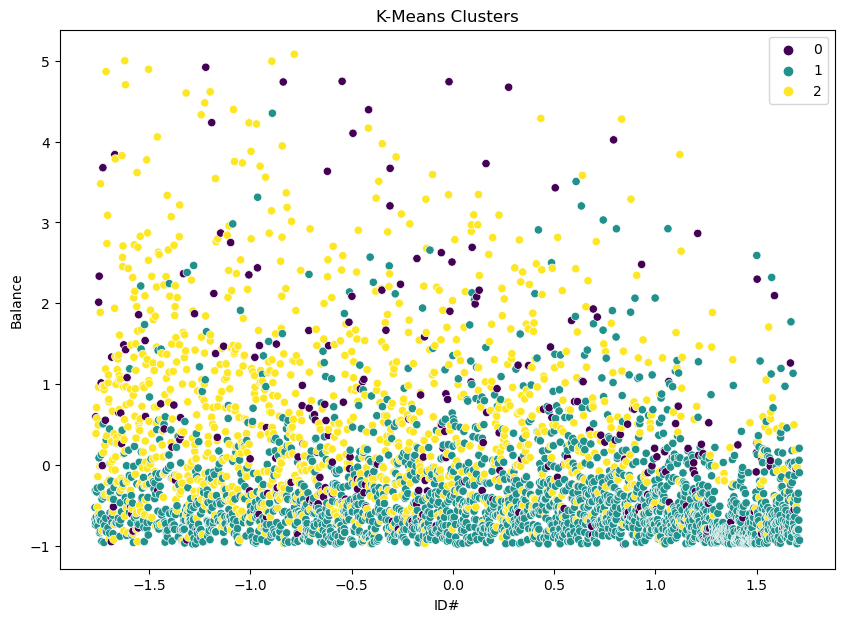

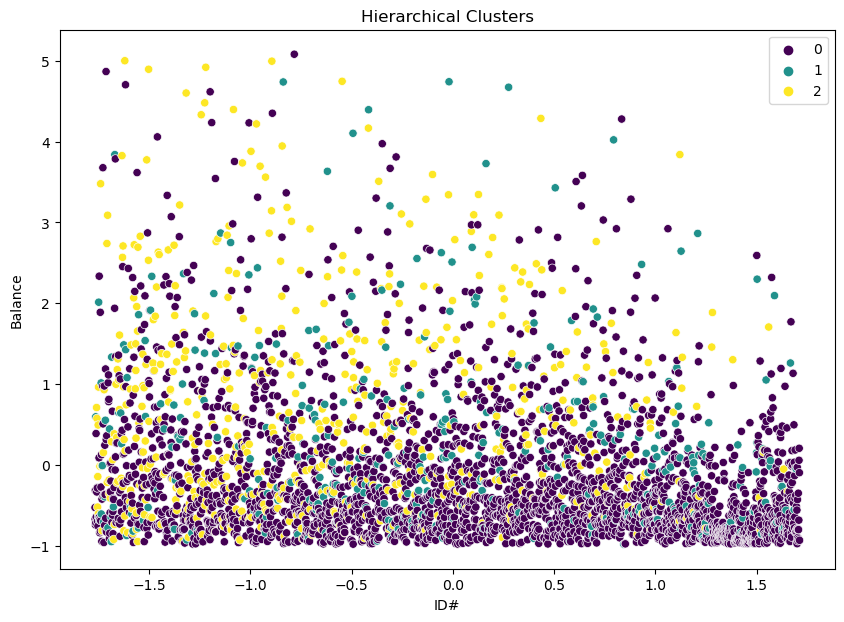

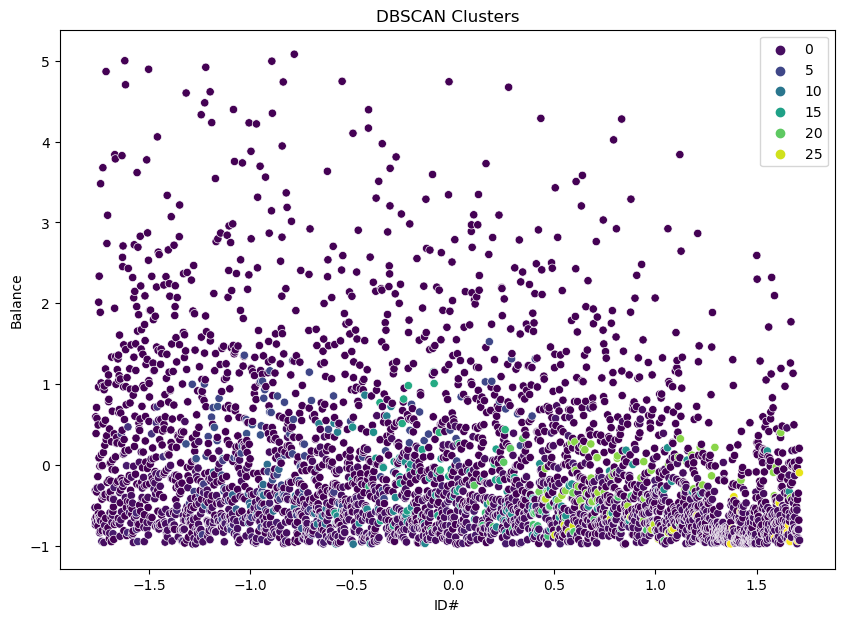

In [35]:
# Scatter plot for K-Means Clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-Means Clusters')
plt.show()

# Scatter plot for Hierarchical Clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue=hierarchical_labels, palette='viridis')
plt.title('Hierarchical Clusters')
plt.show()

# Scatter plot for DBSCAN Clusters
if silhouette_dbscan != -1:
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue=dbscan_labels, palette='viridis')
    plt.title('DBSCAN Clusters')
    plt.show()


In [36]:
# Silhouette Scores
print(f'Silhouette Score for K-Means: {silhouette_kmeans}')
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical}')
if silhouette_dbscan != -1:
    print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')
else:
    print('DBSCAN did not find any clusters')
    

# Explanation of the code
# 1. Import necessary libraries for data manipulation, visualization, and clustering.
# 2. Load the dataset into a DataFrame and handle missing values by dropping them.
# 3. Remove outliers using the IQR method.
# 4. Scale the features using StandardScaler for normalization.
# 5. Perform EDA using pairplots and heatmaps to understand data distribution and relationships.
# 6. Implement K-Means, Hierarchical, and DBSCAN clustering algorithms.
# 7. Evaluate the optimal number of clusters for K-Means using the Elbow method.
# 8. Apply clustering algorithms and calculate Silhouette Scores for evaluation.
# 9. Analyze and interpret the characteristics of the clusters.
# 10. Visualize clustering results using scatter plots.


Silhouette Score for K-Means: 0.29202555388095874
Silhouette Score for Hierarchical Clustering: 0.2735264665074105
Silhouette Score for DBSCAN: -0.3837867186664558


In [ ]:
Silhouette Score: Measures how similar a data point is to its own cluster (cohesion) compared to 
other clusters (separation). 
A higher silhouette score indicates better-defined clusters.